<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


### 0. Imports

In [3]:
%load_ext autoreload
%autoreload 2
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones de soporte
# -----------------------------------------------------------------------
import sys
sys.path.append("..") # añadir el directorio padre al Path
import src.soporte_descriptiva as sd
import src.soporte_preprocesamiento as sp

# Imputación
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor

# 1. Carga de datos

Para comenzar con la tarea de exploración, es necesario primero cargar los datos en un dataframe.

In [4]:
autorenew_df = pd.read_csv("../datos/autorenew.csv")
autorenew_df.head(2)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50


# 2. Exploración inicial y limpieza de los datos

Una vez los datos están cargados, se puede proceder a realizar una exploración inicial de los datos mediante la función soporte para análisis descriptivo ``src.soporte_descriptiva.exploracion_dataframe()``. Se exploran:
- Tamaño y forma del dataframe
- Tipos de dato
- Duplicados
- Nulos
- Valores únicos de las categóricas

In [5]:
sd.exploracion_dataframe(autorenew_df)

El número de datos es 371528 y el de columnas es 20

 ..................... 

Las primeras filas del dataframe son:


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.003478
gearbox,5.439429
model,5.513447
fuelType,8.986133
notRepairedDamage,19.395577



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DATECRAWLED tiene 280500 valores únicos, de los cuales los primeros son:


,count,pct
dateCrawled,,
2016-03-24 14:49:47,7,0.0
2016-03-26 22:57:31,6,0.0
2016-03-19 21:49:56,6,0.0
2016-03-22 10:42:10,5,0.0
2016-04-04 22:38:11,5,0.0


La columna NAME tiene 233531 valores únicos, de los cuales los primeros son:


,count,pct
name,,
Ford_Fiesta,657,0.2
BMW_318i,627,0.2
Opel_Corsa,622,0.2
Volkswagen_Golf_1.4,603,0.2
BMW_316i,523,0.1


La columna SELLER tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
seller,,
private,371525,100.0
commercial,3,0.0


La columna OFFERTYPE tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
offerType,,
offer,371516,100.0
request,12,0.0


La columna ABTEST tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
abtest,,
test,192585,51.8
control,178943,48.2


La columna VEHICLETYPE tiene 7 valores únicos, de los cuales los primeros son:


,count,pct
vehicleType,,
small car,80023,21.5
combi,67564,18.2
bus,30201,8.1
convertible,22898,6.2
coupe,19015,5.1


La columna GEARBOX tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
gearbox,,
manually,274214,73.8
automatic,77105,20.8


La columna MODEL tiene 251 valores únicos, de los cuales los primeros son:


,count,pct
model,,
golf,30070,8.1
andere,26400,7.1
3er,20567,5.5
polo,13092,3.5
corsa,12573,3.4


La columna FUELTYPE tiene 7 valores únicos, de los cuales los primeros son:


,count,pct
fuelType,,
petrol,223857,60.3
diesel,107746,29.0
lpg,5378,1.4
cng,571,0.2
hybrid,278,0.1


La columna BRAND tiene 40 valores únicos, de los cuales los primeros son:


,count,pct
brand,,
volkswagen,79640,21.4
bmw,40274,10.8
opel,40136,10.8
mercedes_benz,35309,9.5
audi,32873,8.8


La columna NOTREPAIREDDAMAGE tiene 2 valores únicos, de los cuales los primeros son:


,count,pct
notRepairedDamage,,
no,263182,70.8
yes,36286,9.8


La columna DATECREATED tiene 114 valores únicos, de los cuales los primeros son:


,count,pct
dateCreated,,
2016-04-03 00:00:00,14450,3.9
2016-04-04 00:00:00,14022,3.8
2016-03-20 00:00:00,13547,3.6
2016-03-12 00:00:00,13379,3.6
2016-03-21 00:00:00,13305,3.6


La columna LASTSEEN tiene 182806 valores únicos, de los cuales los primeros son:


,count,pct
lastSeen,,
2016-04-06 13:45:54,17,0.0
2016-04-07 06:45:59,17,0.0
2016-04-07 08:16:54,16,0.0
2016-04-06 09:46:00,16,0.0
2016-04-06 04:17:20,16,0.0


A partir de la exploración rápida se obtiene que:
- Los tipos de dato son correctos a priori, unicamente a excepción de las variables temporales. 'postalCode' es una variable de tipo numérico pero su naturaleza es en realida categórica, de potencialmente alta cardinalidad. Se convierten las variables temporales a datetime que luego se transformarán en variables categóricas de año, mes o tiempo desde última visita (en el caso de 'lastSeen').
- Existen pocos duplicados que habrá que eliminar.
- En cuanto a valores nulos, la mayoría de columnas están libres de defecto. Sin embargo, 'vehicleType' y 'notRepairedDamage' tienen altas proporciones de nulos. Será necesario aplicar una estrategia de imputación cuidadosa tras haber realizado el resto de la limpieza.
- Los valores unicos de las categóricas presentan alta cardinalidad para 'name', 'model' y los campos de fecha. Es posible por esas razones que 'name' deba ser eliminado al no poder aportar información en unas pocas categorías o al menos mantenerla con las categorías más frecuentes, agrupando las demás en una nueva categoría 'otras'. Lo mismo ocurriría con 'Model'. Las variables 'offerType' y 'seller' no ofrecen ninguna variabilidad al representar su clase mayoritaria prácticamente el 100% de los datos, así que se pueden eliminar.


In [6]:
# convertir a minusculas los nombres de columna para trabajar más facilmente con ellos
autorenew_df.columns = [columna.lower() for columna in autorenew_df.columns]

# convertir variables temporales a datetime
autorenew_df["lastseen"] = pd.to_datetime(autorenew_df["lastseen"], format="%Y-%m-%d %H:%M:%S")
autorenew_df["datecreated"] = pd.to_datetime(autorenew_df["datecreated"], format="%Y-%m-%d %H:%M:%S")
autorenew_df["datecrawled"] = pd.to_datetime(autorenew_df["datecrawled"], format="%Y-%m-%d %H:%M:%S")

# convertir postal code a 'object' 
autorenew_df["postalcode"] = autorenew_df["postalcode"].astype("object")

# eliminar duplicados
print("Shape previo a eliminar duplicados", autorenew_df.shape)
autorenew_df.drop_duplicates(inplace=True)
print("Shape tras eliminar duplicados", autorenew_df.shape)

# eliminar variables no informativas
autorenew_df.drop(columns=["offertype","seller"], inplace=True)

# eliminar variables de alta cardinalidad como 'name'
autorenew_df.drop(columns=["name"], inplace=True)

Shape previo a eliminar duplicados (371528, 20)
Shape tras eliminar duplicados (371524, 20)


## 2.1 Exploración univariante

Teniendo en mente que posteriormente será necesario tratar los nulos, se puede proceder a evaluar la distribución de la variables numéricas. Empecemos por un `describe()` para identificar rapidamente si existen errores en la codificación de sus valores en la forma de valores atípicos o fuera de rango que representen en realidad valores nulos.

In [7]:
autorenew_df.describe().T

,count,mean,min,25%,50%,75%,max,std
datecrawled,371524,2016-03-21 13:30:30.336384512,2016-03-05 14:06:22,2016-03-13 12:51:46.500000,2016-03-21 18:36:22,2016-03-29 14:49:31.249999872,2016-04-07 14:36:58,NaN
price,371524.0,17295.302511,0.0,1150.0,2950.0,7200.0,2147483647.0,3587973.058862
yearofregistration,371524.0,2004.578033,1000.0,1999.0,2003.0,2008.0,9999.0,92.867097
powercv,371524.0,113.967402,0.0,69.0,104.0,148.0,19726.0,189.517492
kilometer,371524.0,125618.842928,5000.0,125000.0,150000.0,150000.0,150000.0,40112.138811
monthofregistration,371524.0,5.734451,0.0,3.0,6.0,9.0,12.0,3.712423
datecreated,371524,2016-03-20 19:42:50.398682624,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
nrofpictures,371524.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lastseen,371524,2016-03-30 03:37:56.511738112,2016-03-05 14:15:08,2016-03-23 11:36:06.750000128,2016-04-03 23:17:18,2016-04-06 10:45:02,2016-04-07 14:58:51,NaN


Cosas que llaman la atención, obviando las variables de fecha:
- Existe una enorme variabilidad en los valores de 'price', con valores en 0 lo que podría indicar que dichos valores son una codificación para valores nulos. Existen tambien otros extremadamente altos que superan los 2 147 millones, que apuntan sospechosamente a ser outliers.
- El año de registro tiene valores muy pequeños, datando del 1000 D.C. cuando los coches no se habían inventado y de 9999, que es un valor típico para codificar valores nulos, además del futuro.
- De la misma forma que con 'price', los caballos de potencia no tiene mucho sentido que sean de valor 0 lo que podría indicar un nulo encubierto. Los valores de casi 20k caballos de potenica apuntan a ser outliers.
- Los kilometros parecen encajar en los correspondientes al uso de un coche de segunda mano.
- Los valores de monthOfRegistration no tienen sentido o bien en el mes 12, si se empieza a contar por el 0, o al contrario. El sentido común invita a pensar que un mes 0 no es posible y por lo tanto ese valor es nulo.
- Es llamativo que nrOfPictures tenga unicamente valores 0, pero en ese caso, la variable no aporta información.

En primer lugar, se elimina la variable nrOfPictures.

In [8]:
# eliminar la variable nrOfPictures
autorenew_df.drop(columns="nrofpictures", inplace=True)

Ahora, para comprobar las sospechas sobre los valores nulos o outliers, se plotean las distribuciones de las variables numéricas.

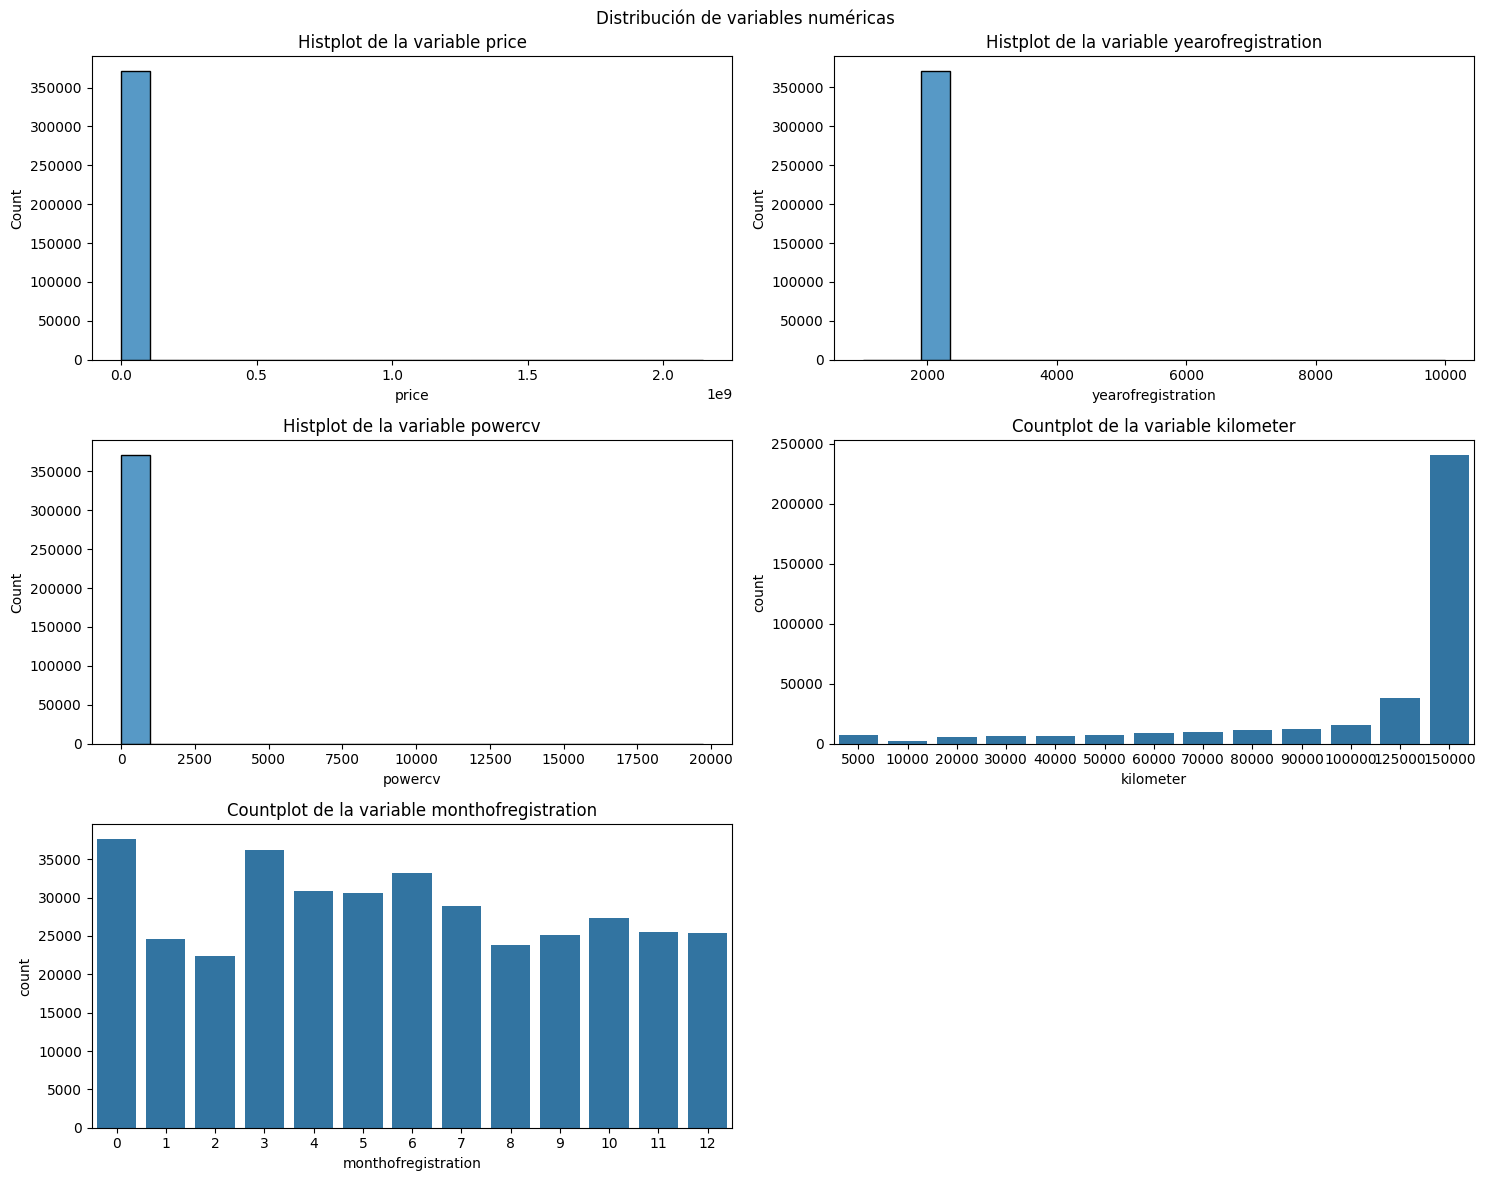

In [9]:
df_num = sp.separar_dataframe(autorenew_df)[0]
sp.plot_univariante_numerica(df_num, ncols=2)

Da la impresion de que los valores de las variables 'price' y 'powerCV' se centran mucho en 0, aunque puede ser debido a que los outliers deforman la escala. Habiendo analizado los rangos a partir del método ``describe()``, sabemos que no más 25% de los valores son 0 en el caso de ninguna de las dos variables, así que es probable que debido a los outliers no se observe satisfactoriamente el rango.

El año de registro está centrado alrededor de probablemente 2003, deformando los valores atípicos la imagen de su distribución. 

Se corrigen los valores 0 y se corrigen lo valores inverosímiles de la columna yearOfRegistration.

In [10]:
# reemplazar por nulos valores 0
autorenew_df[["price","powercv"]] = autorenew_df[["price","powercv"]].replace(0,np.nan)

# reemplazar por nulos los valores inverosímiles del año de registro. 1885 año de invención del automovil, 2024 año presente.
autorenew_df["yearofregistration"] = np.where((autorenew_df["yearofregistration"] < 1885) | (autorenew_df["yearofregistration"] > 2024),
                                               np.nan, autorenew_df["yearofregistration"])

Se dibujan de nuevo las distribuciones para observar el efecto de los cambios.

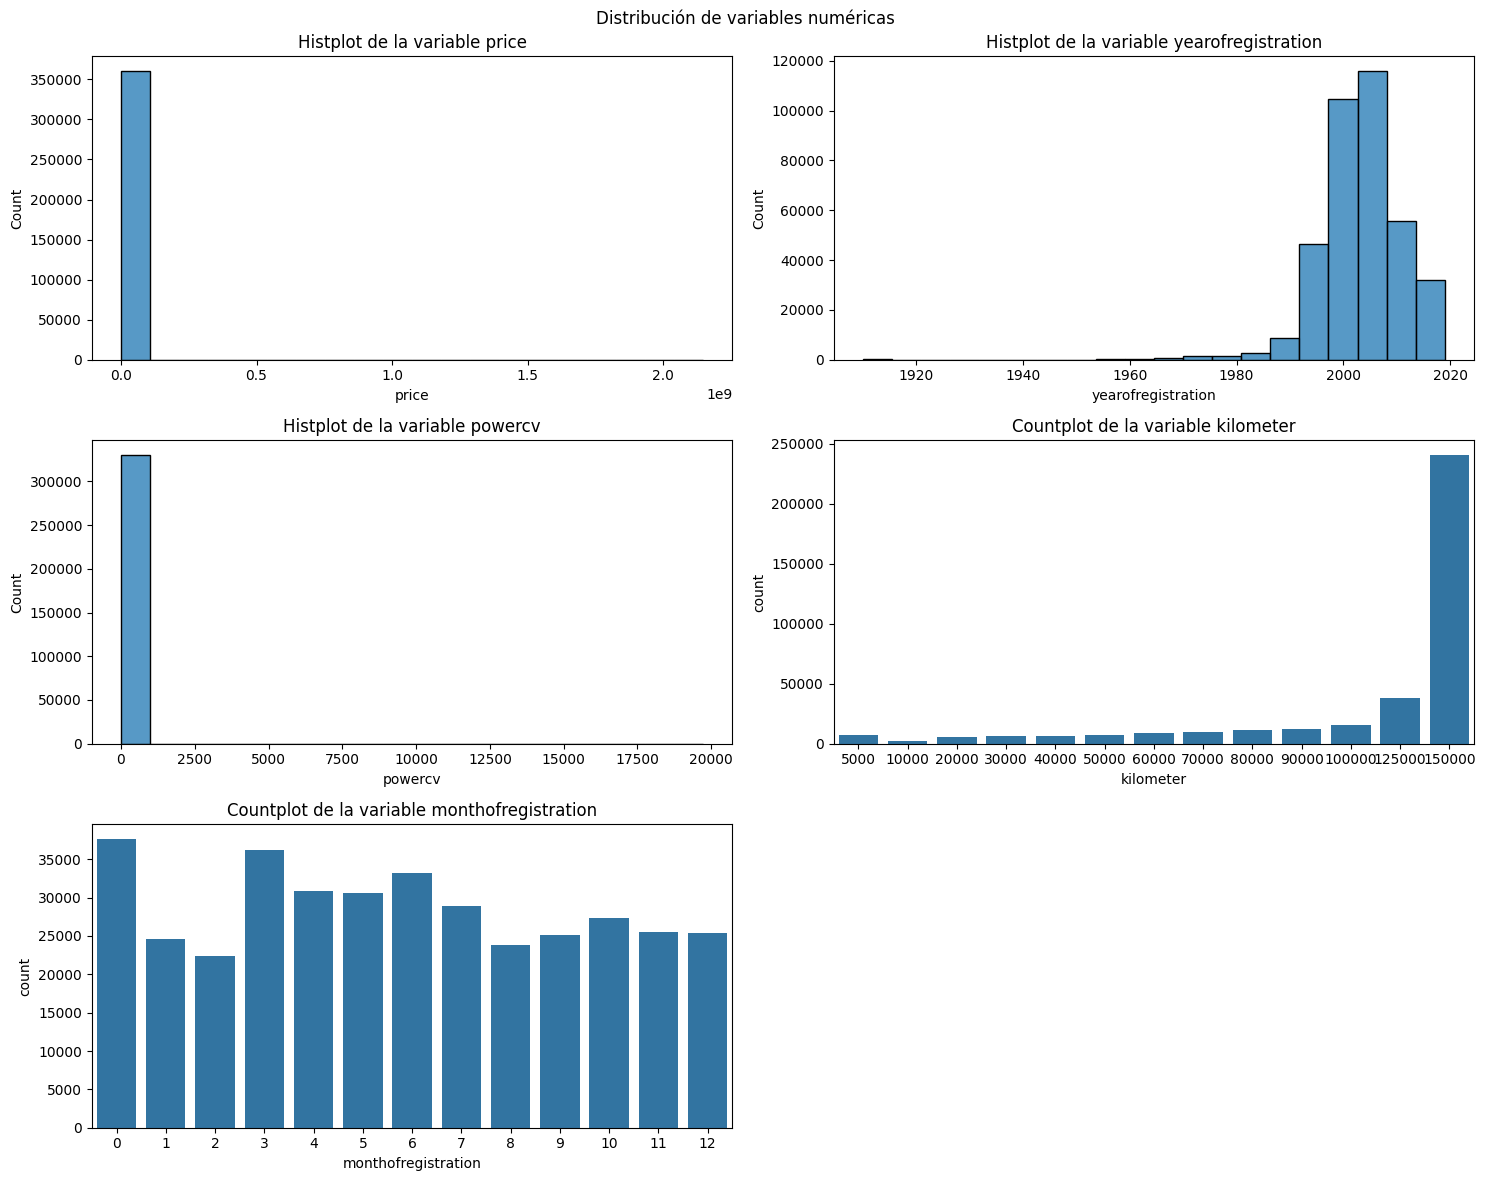

In [11]:
df_num = sp.separar_dataframe(autorenew_df)[0]
sp.plot_univariante_numerica(df_num, ncols=2)

Efectivamente, da la impresión de que en el caso de las variables 'price' y 'powerCV', los outliers deforman el gráfico. Esto será más fácil de ver ploteando los boxplots:

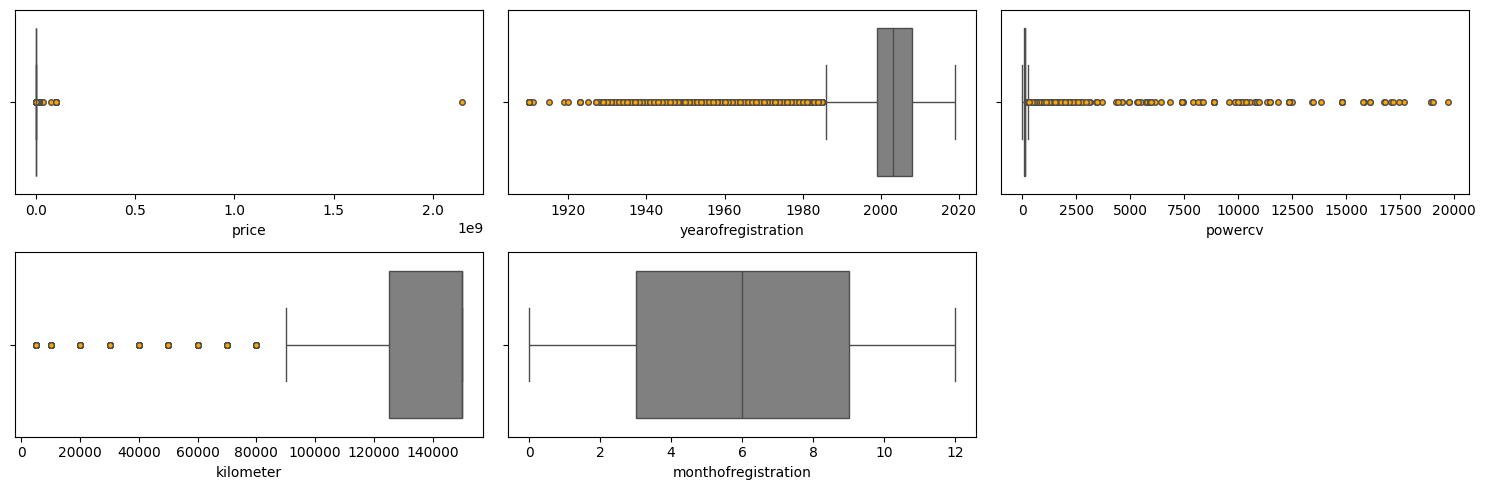

In [12]:
visualizador = sp.Visualizador(dataframe=autorenew_df.drop(columns="postalcode"))
visualizador.deteccion_outliers()

La exploración por boxplots confirma que la sospecha sobre los outliers. 

En caso de 'price' la deformación visual de la distribución y la desviación estándar vienen dados principalmente por un valor extremo. Ese valor más extremo probablemente se trate de un error (errata, moneda distinta a la del resto de coches, etc), ya que se trata de un coche de segunda mano que se vende por 2 147 millones de euros. De cualquier forma, representa un atípico que sería razonable directamente eliminar del modelo, ya que al tratarse de la variable objetivo, aunque el valor fuera correcto, puede deformar tanto la inferencia del modelo el mantenerlo VS el retorno que aporta que no merece la pena mantenerlo. 


Habría que estudiar también si sería necesario dividir el conjunto de datos para crear modelos separados para coches normales y de lujo.

Estudiando y eliminando el valor máximo para la variable objetivo:

In [13]:
print("Observando la marca y modelo del máximo outlier del dataset:")
display(autorenew_df.loc[autorenew_df["price"].idxmax(),["price","brand","model"]])
autorenew_df.drop(index=autorenew_df["price"].idxmax(), inplace=True)

Observando la marca y modelo del máximo outlier del dataset:


price      2147483647.0
brand    sonstige_autos
model               NaN
Name: 129969, dtype: object



En el caso de 'powercv' parece haber más valores que generan la distorsión. Será necesario tratar estos atípicos tras la exploración.

Ahora, es momento de observar los valores de las variables categóricas. 

In [14]:
sp.separar_dataframe(autorenew_df)[1].describe(include="O")

,abtest,vehicletype,gearbox,model,fueltype,brand,notrepaireddamage,postalcode
count,371523,237760,351314,351040,338137,371523,299463,371523
unique,2,7,2,251,7,40,2,8150
top,test,small car,manually,golf,petrol,volkswagen,no,10115
freq,192582,80022,274211,30070,223854,79639,263179,828


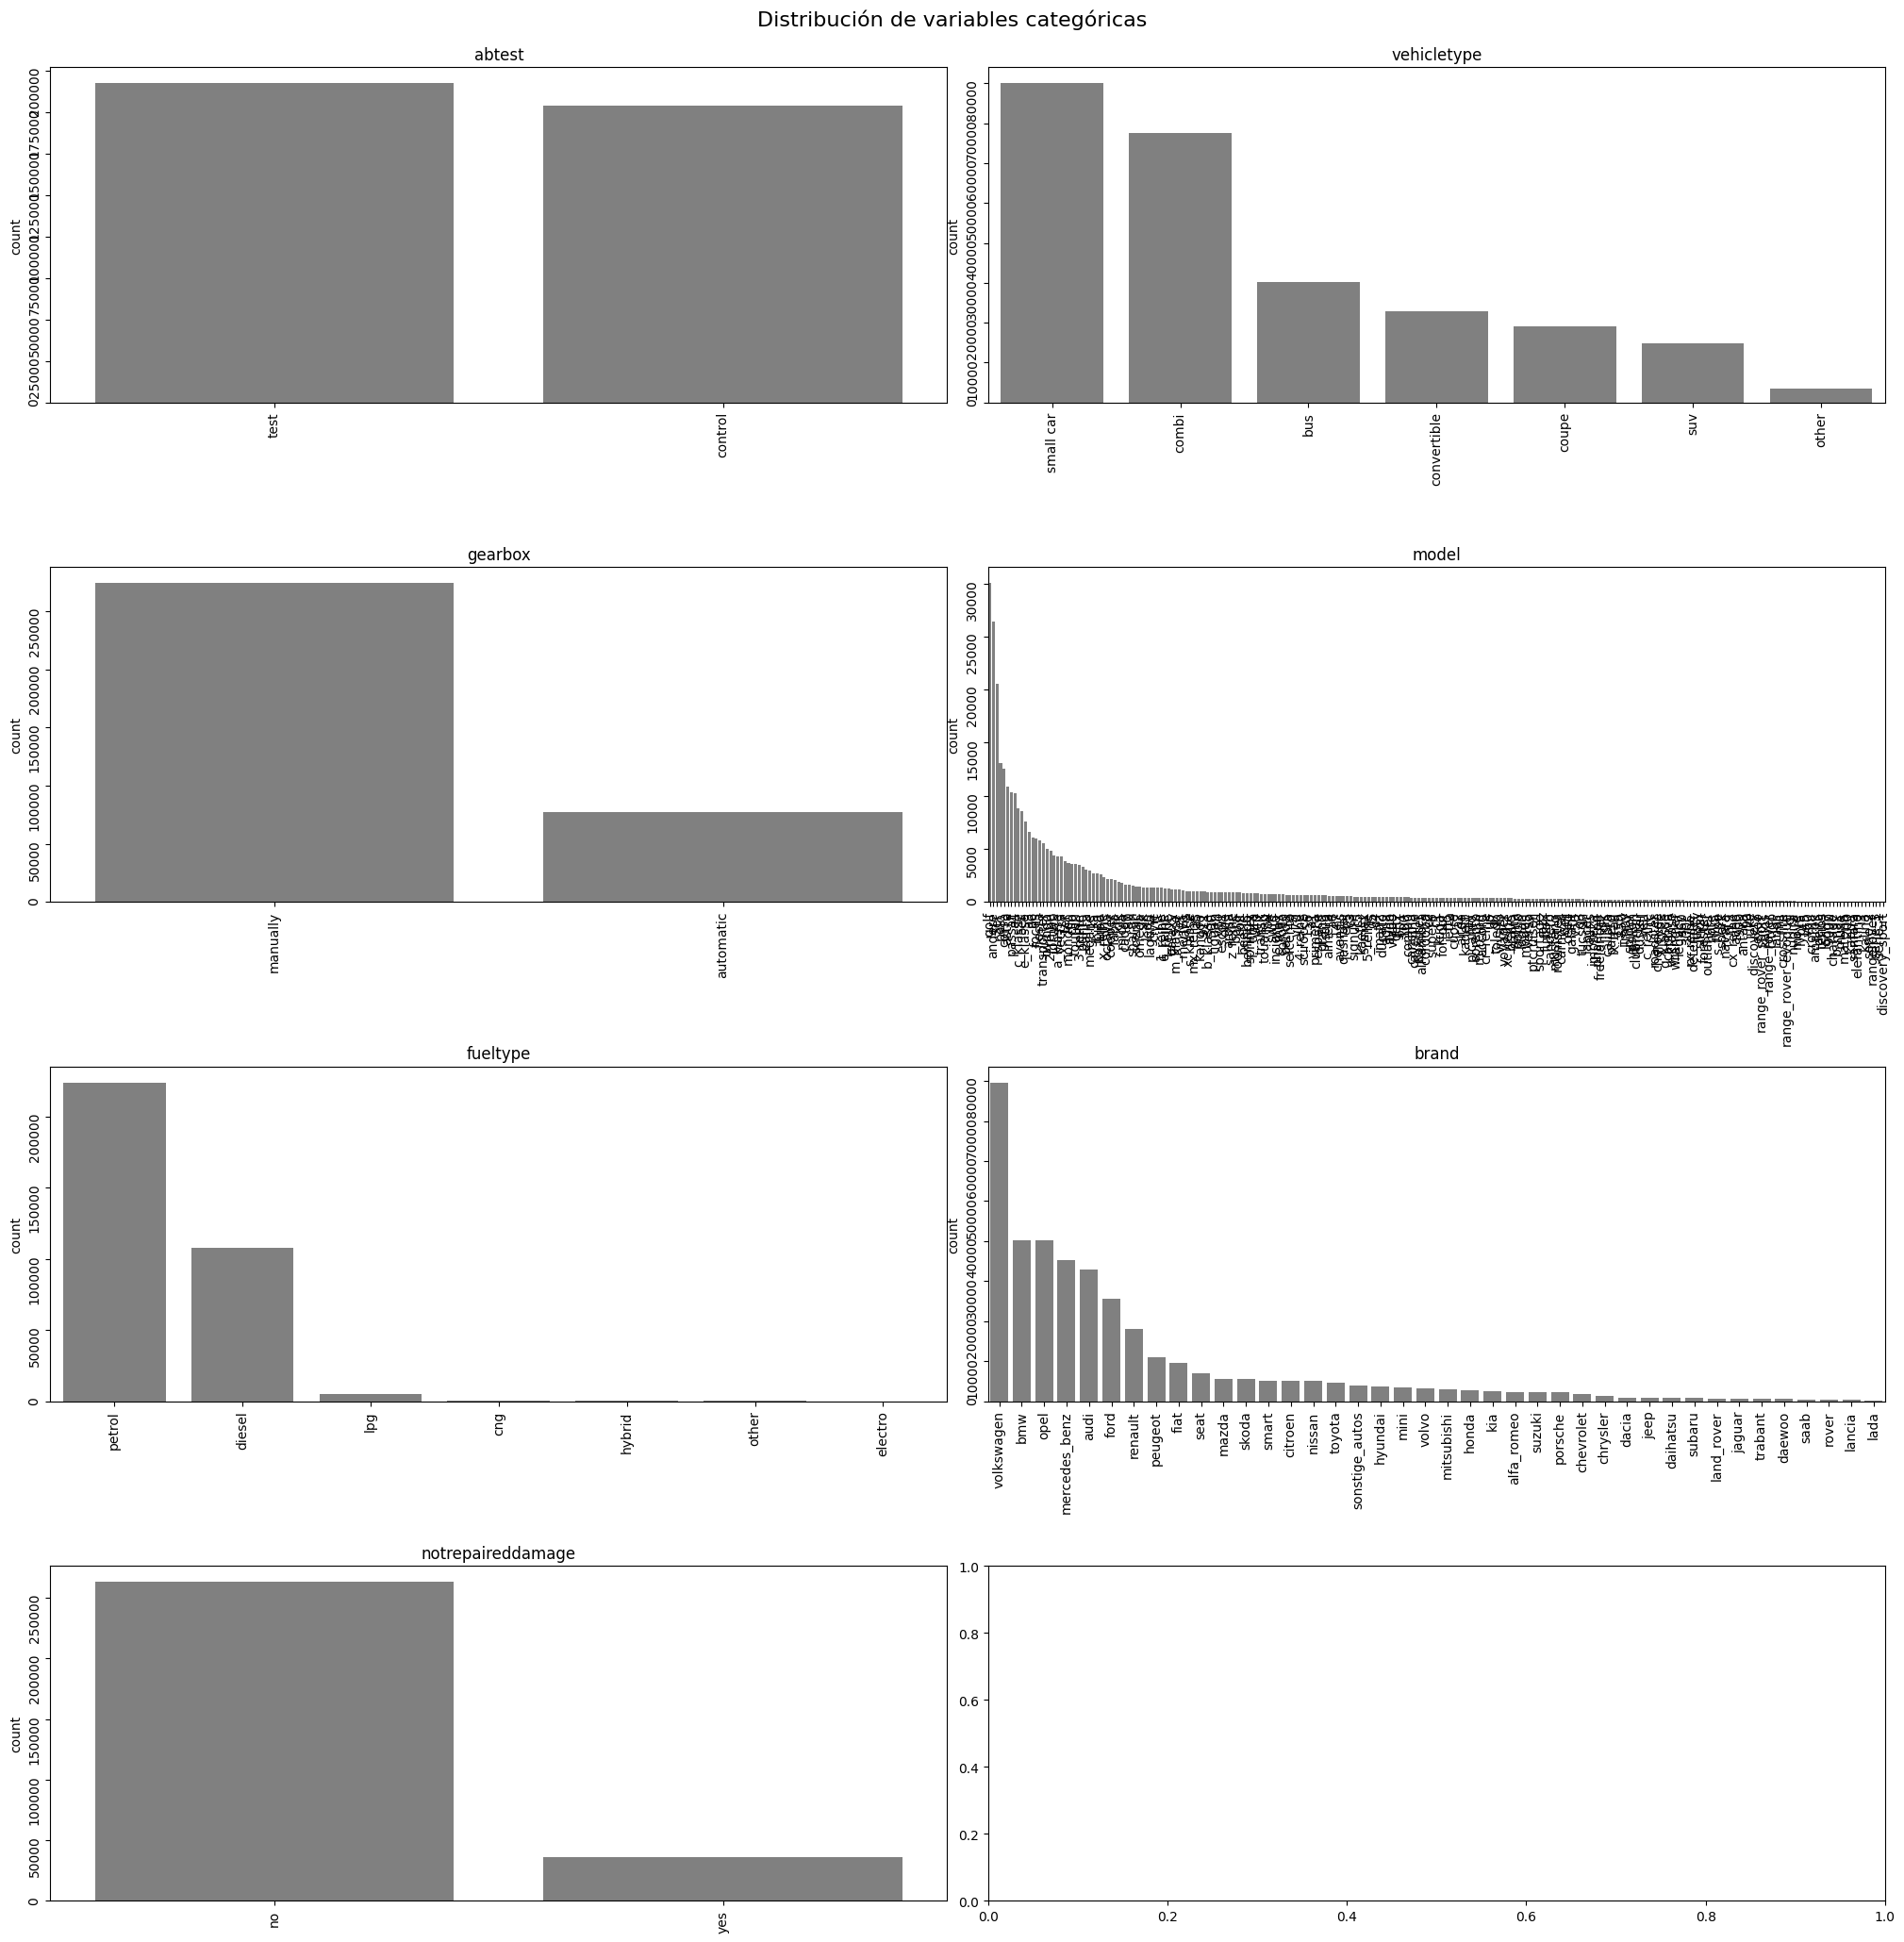

In [15]:
visualizador.plot_categoricas(tamano_grafica=(20,20))

La variable 'model' posee una cardinalidad demasiado alta para que muchas de sus categorias aporten significancia estadistica debido a su tamaño muestral. Muy probablemente, los modelos tendrán que agruparse en unas pocas categorías muy frecuentes y ota nueva categoría 'others'. Otra opción sería prescindir de esa variable directamente.


In [17]:
print(f"""Los 20 valores más frecuentes de la variable 'model' suman el {round(autorenew_df['model']
                                                                             .value_counts(normalize=True)[:20].sum()*100,2)}% de frecuencias""")

Los 20 valores más frecuentes de la variable 'model' suman el 59.05% de frecuencias


De manera similar, aunque debido a la presencia de nulos y de cateogorías poco frecuentes sencillamente, 'fueltype' también tiene categorías que deberán ser agrupadas. Lo mismo ocurre con 'brand'.

In [18]:
autorenew_df['fueltype'].value_counts()

fueltype
petrol     223854
diesel     107745
lpg          5378
cng           571
hybrid        278
other         207
electro       104
Name: count, dtype: int64

In [19]:
autorenew_df['brand'].value_counts(normalize=True)[:10]

brand
volkswagen       0.214358
bmw              0.108402
opel             0.108031
mercedes_benz    0.095033
audi             0.088482
ford             0.068833
renault          0.048366
peugeot          0.029681
fiat             0.026044
seat             0.018901
Name: proportion, dtype: float64

## 2.2 Gestión de nulos

La ocurrencia de nulos por variable queda de con el siguiente reparto:

In [20]:
autorenew_df.isna().sum()

datecrawled                 0
price                   10778
abtest                      0
vehicletype            133763
yearofregistration        182
gearbox                 20209
powercv                 40820
model                   20483
kilometer                   0
monthofregistration         0
fueltype                33386
brand                       0
notrepaireddamage       72060
datecreated                 0
postalcode                  0
lastseen                    0
dtype: int64

Se parte de la gestión de nulos para la variable objetivo, seguido de las variables numéricas y posteriormente las categóricas.

### 2.2.1 Gestion de nulos en la variable objetivo

La gestión de nulos en la variable objetivo se aplica directamente mediante la eliminación de dichos registros. La información contenida en la variable objetivo es equivalente a la información contenida en los valores de las variables independientes de su misma fila, ya que se pretende generar una representación de la objetivo a partir de las mismas. Sin valor de referencia para la variable objetivo, no es razonable introducir sobreajuste al modelo al utilizar valores que han sido predichos mediante un modelo de regresión para entrenar otro modelo de regresión.

Por lo tanto, se eliminan.

In [22]:
autorenew_df = autorenew_df[~autorenew_df["price"].isna()]

### 2.2.2 Gestión de nulos en variables independientes numéricas

Las variables numéricas a imputar son 'powercv' y 'yearofregistration'.

Comparación de estrategias entre:
- SimpleImputer: Mean y median
- KNNImputer
- IterativeImputer: RandomForest

Se comienza reseteando el índice del dataset original, ya que se han eliminado registros completos desde su importación.

In [23]:
autorenew_df.reset_index(inplace=True)

Se generan copias para generar el benchmarking entre técnicas.

In [24]:
# copies of the original dataframe to compare strategies
autorenew_df_simple_mean = autorenew_df[["powercv","yearofregistration"]].copy()
autorenew_df_simple_median = autorenew_df[["powercv","yearofregistration"]].copy()
autorenew_df_knn = autorenew_df.select_dtypes(include=np.number).copy()
autorenew_df_iterative = autorenew_df.select_dtypes(include=np.number).copy()

Se comienza por las técnicas más sencillas, que no son otras que la imputación por la media y la mediana.

In [25]:
simple_mean_imputer = SimpleImputer(strategy="mean")
simple_median_imputer = SimpleImputer(strategy="median")

autorenew_df_simple_mean_imputed = simple_mean_imputer.fit_transform(autorenew_df_simple_mean)
autorenew_df_simple_mean_imputed = pd.DataFrame(autorenew_df_simple_mean_imputed,columns=["powercv_mean","yearofregistration_mean"])

autorenew_df_simple_median_imputed = simple_median_imputer.fit_transform(autorenew_df_simple_median)
autorenew_df_simple_median_imputed = pd.DataFrame(autorenew_df_simple_median_imputed,columns=["powercv_median","yearofregistration_median"])

In [26]:
knn_imputer = KNNImputer(n_neighbors=2)
autorenew_df_knn_imputed = knn_imputer.fit_transform(autorenew_df_knn)

In [28]:
knn_columns = [columna + "_knn" for columna in autorenew_df_knn.columns]
autorenew_df_knn_imputed = pd.DataFrame(autorenew_df_knn_imputed,columns=knn_columns)

In [29]:
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
                           max_iter=10,
                           random_state=0)
autorenew_df_iterative_imputed = iterative_imputer.fit_transform(autorenew_df_iterative)
iterative_columns = [columna + "_iterative" for columna in autorenew_df_iterative.columns]
autorenew_df_iterative_imputed = pd.DataFrame(autorenew_df_iterative_imputed,columns=iterative_columns)

In [30]:
comparison_df = pd.concat([autorenew_df,autorenew_df_simple_mean_imputed,
 autorenew_df_simple_median_imputed,autorenew_df_knn_imputed,autorenew_df_iterative_imputed],axis=1)


comparison_df_selected = comparison_df[[col for col in comparison_df.columns if col.startswith('power') or col.startswith('yearof')]]
comparison_df_selected.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
powercv,323794.0,128.099610,194.159350,1.0,79.0,114.0,148.0,19726.0
powercv_iterative,360745.0,127.080728,190.813144,1.0,79.0,111.0,148.0,19726.0
powercv_knn,360745.0,126.365207,191.863073,1.0,78.5,111.0,148.0,19726.0
powercv_mean,360745.0,128.099610,183.946903,1.0,85.0,120.0,148.0,19726.0
powercv_median,360745.0,126.655391,183.996577,1.0,85.0,114.0,148.0,19726.0
yearofregistration,360595.0,2003.446182,7.629181,1910.0,1999.0,2004.0,2008.0,2019.0
yearofregistration_iterative,360745.0,2003.443885,7.630822,1910.0,1999.0,2004.0,2008.0,2019.0
yearofregistration_knn,360745.0,2003.444985,7.630874,1910.0,1999.0,2004.0,2008.0,2019.0
yearofregistration_mean,360745.0,2003.446182,7.627595,1910.0,1999.0,2004.0,2008.0,2019.0
yearofregistration_median,360745.0,2003.446412,7.627603,1910.0,1999.0,2004.0,2008.0,2019.0


En cuanto a la variable 'powercv', parece que los métodos que mejor se aproximan a la distribucion inicial son el Knn y el iterative. A pesar de que las imputaciones por la media y la mediana aproximan a la perfección su mismo estadístico, deforman muchísimo la desviación típica y el estadístico complementario (mediana o media, respectivamente). Por otro lado, el KNN y el Iterative no se acercan tanto a la mediana ni a la media, pero deforman menos la desviación estándar. 

En cuanto a tiempos de computación:
- KNN. 22 minutos.
- Iterative. 3 minutos.
- SimpleImputer. 0,4 segundos.

Está claro que computacionalmente hablando, el SimpleImputer es muy conveniente ya que trabaja muy rápido, mientras que el KNN se antoja impracticable. 

Por lo tanto, el método de elección es Iterative ya que se consigue una solución más redondeada en todos los aspectos.

### Gestión de nulos en variables independientes categóricas

## Tratamiento de outliers

# 3. Creacion de nuevas variables